# Assignment 2: Supervised Machine Learning (Classification)





In [122]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
from config_reader import ConfigReader
from dataset import Dataset
from data_predictor import DataPredictor
from evaluation_metrics import EvaluationMetrics
import matplotlib as plt
%matplotlib inline

The three sklearn classifiers [_SVM_](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) (Support Vector Classification), [_Logistic Regression Classifier_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), and [_Dummy Classifier_](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) are imported to the notebook and instantiated. You should try additional classifiers from [sklearn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) yourself.   
**Don't forget** to import and add your own implementation of kNN!

In [124]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from knn import kNN


knn_clf = kNN(10)

dummy_clf = DummyClassifier(strategy="most_frequent")
support_vector_clf = svm.SVC(kernel="linear") 
logistic_regression_clf = LogisticRegression(random_state=0, max_iter=10000)


## Heart Disease Dataset

Let's try the classifiers on the Heart Disease Dataset, by passing the created classifier objects to ``DataPredictor``'s ``best_classifier`` method (add your additional classifier objects to the list here). For comparison and visualization, the methods ``print_evaluation_results`` and ``visualize_classification_results`` are called.

In [125]:
config_dict = ConfigReader.read_json_config("./config_heart_disease.json")
dataset = Dataset(config_dict)
predictor = DataPredictor(dataset, config_dict)

In [126]:
import numpy as np
dataset.split_data(impute_strategy='mean')
e = EvaluationMetrics(np.array([0, 1, 1, 0, 2, 2, 2, 2, 2]), np.array([0, 1, 0, 0, 2, 2, 2, 0, 0]))
print(e)
print(e.confusion_matrix)


Evaluation Summary:
    Accuracy: 0.6666666666666666
    Precision:
        Class 0: 0.4                  Class 1: 1.0                  Class 2: 1.0			
    Recall:
        Class 0: 1.0                  Class 1: 0.5                  Class 2: 0.6			
    F1 Score:
        Class 0: 0.5714285714285715   Class 1: 0.6666666666666666   Class 2: 0.7499999999999999				
    True Positives:
        Class 0: 2                    Class 1: 1                    Class 2: 3				
    True Negatives:
        Class 0: 4                    Class 1: 7                    Class 2: 4				
    False Positives:
        Class 0: 3                    Class 1: 0                    Class 2: 0		
    False Negatives:
        Class 0: 0                    Class 1: 1                    Class 2: 2	

[[2 0 0]
 [1 1 0]
 [2 0 3]]



Evaluation Summary:
    Accuracy: 0.7697368421052632
    Precision:
        Class 0: 0.7573529411764706   Class 1: 0.7797619047619048			
    Recall:
        Class 0: 0.7357142857142858   Class 1: 0.7987804878048781			
    F1 Score:
        Class 0: 0.7463768115942029   Class 1: 0.7891566265060241				
    True Positives:
        Class 0: 103                  Class 1: 131				
    True Negatives:
        Class 0: 131                  Class 1: 103				
    False Positives:
        Class 0: 33                   Class 1: 37		
    False Negatives:
        Class 0: 37                   Class 1: 33	

[0.5394736842105263, 0.7598684210526315, 0.7631578947368421, 0.7697368421052632]
['DummyClassifier', 'kNN', 'LogisticRegression', 'SVC']


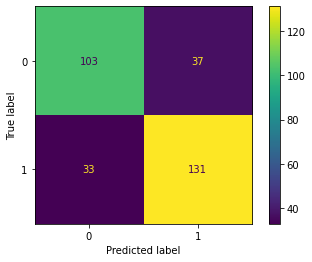

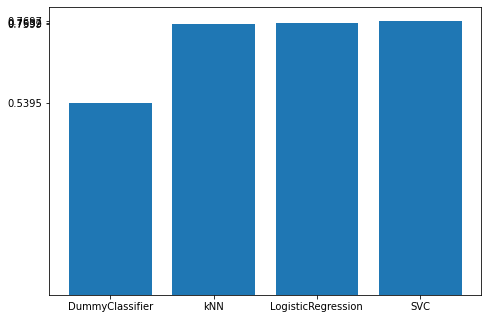

In [127]:
best_classifier = predictor.best_classifier([dummy_clf, support_vector_clf, logistic_regression_clf, knn_clf])
predictor.print_evaluation_results()
predictor.visualize_classification_results()

## Parkinson Speech Dataset

Now with the Parkinson Speech Dataset, again the created classifier objects are passed to ``DataPredictor``'s ``best_classifier`` method (add your additional classifier objects to the list here). For comparison and visualization, the methods ``print_evaluation_results`` and ``visualize_classification_results`` are called.

In [128]:
config_dict = ConfigReader.read_json_config("./config_parkinson_sound_recording.json")
dataset = Dataset(config_dict)
predictor = DataPredictor(dataset, config_dict)

In [129]:
best_classifier = predictor.best_classifier([dummy_clf, knn_clf])#, support_vector_clf, logistic_regression_clf])
predictor.print_evaluation_results()
predictor.visualize_classification_results()


Evaluation Summary:
    Accuracy: 0.6441102756892231
    Precision:
        Class 0: 0.5978260869565217   Class 1: 0.6837209302325581			
    Recall:
        Class 0: 0.6179775280898876   Class 1: 0.665158371040724			
    F1 Score:
        Class 0: 0.6077348066298343   Class 1: 0.6743119266055045				
    True Positives:
        Class 0: 110                  Class 1: 147				
    True Negatives:
        Class 0: 147                  Class 1: 110				
    False Positives:
        Class 0: 74                   Class 1: 68		
    False Negatives:
        Class 0: 68                   Class 1: 74	



ValueError: plot_confusion_matrix only supports classifiers

In [ ]:
import knn
r = np.random.rand(2,5)
s = np.random.randint(2, size=2)
k = knn.kNN(3)
k.fit(r,s)
k._point_predict(np.zeros(5))
#knn.kNN._point_predict(r,s)
_classifier_results()